In [101]:
import pandas as pd 
import numpy as np 
import random as rd 
import matplotlib.pyplot as plt 
import warnings
import sklearn 
import seaborn as sns 
%matplotlib inline
warnings.filterwarnings('ignore')

In [31]:
# create a function for plotting the heatmap
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True,#Annotate the boxes with conf_mat info
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    # Even though the issue is not appearing here but sometimes annotation labels are cut off
    # to fix that do this
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)   

#### load the data

In [2]:
data = pd.read_excel("./data/Abnormality.xls")
data.head()

abnormality1  abnormality2  abnormality3  abnormality4  abnormality5  \
0      0.193085      0.455707      0.216496      0.103720      0.180818   
1      0.452288      0.400769      0.322787      0.287073      0.309175   
2      0.415949      0.232735      0.321861      0.297168      0.204455   
3      0.139162      0.043859      0.025466      0.069759      0.213910   
4      0.193064      0.171187      0.351955      0.341625      0.257745   

   abnormality6  abnormality7  abnormality8  abnormality9  abnormality10  ...  \
0      0.094591      0.486603      0.396159      0.076873       0.114092  ...   
1      0.392882      0.497208      0.182264      0.490559       0.249904  ...   
2      0.344506      0.325496      0.252884      0.260319       0.239499  ...   
3      0.163442      0.019056      0.130888      0.175783       0.143204  ...   
4      0.209740      0.278308      0.134570      0.124057       0.250878  ...   

   abnormality88  abnormality89  abnormality90  abnormality91  abnormality92  \
0       0.412458       0.368506       0.472793       0.559649       0.527417   
1       0.602254       0.613619       0.542846       0.404969       0.292419   
2       0.289043       0.522905       0.372344       0.640596       0.349795   
3       0.091905       0.200005       0.113818       0.116287       0.073089   
4       0.039560       0.391420       0.122522       0.051515       0.138653   

   abnormality93  abnormality94  abnormality95  abnormality96  abnormality97  
0       0.704218       0.009908       0.315815       0.494521       0.418626  
1       0.441169       0.610792       0.438394       0.387770       0.462840  
2       0.473228       0.091674       0.471392       0.417113       0.514597  
3       0.160781       0.013564       0.050065       0.240611       0.049919  
4       0.249248       0.082230       0.028890       0.013166       0.084683  

[5 rows x 97 columns]

In [5]:
#transpose the data
data = data.T
#preview the data
data.head()

0         1         2         3         4         5    \
abnormality1  0.193085  0.452288  0.415949  0.139162  0.193064  0.473900   
abnormality2  0.455707  0.400769  0.232735  0.043859  0.171187  0.397085   
abnormality3  0.216496  0.322787  0.321861  0.025466  0.351955  0.304562   
abnormality4  0.103720  0.287073  0.297168  0.069759  0.341625  0.322145   
abnormality5  0.180818  0.309175  0.204455  0.213910  0.257745  0.465277   

                   6         7         8         9    ...       109       110  \
abnormality1  0.453628  0.226506  0.486974  0.202100  ...  0.325062  0.390048   
abnormality2  0.435364  0.198269  0.478201  0.271058  ...  0.415000  0.152374   
abnormality3  0.190576  0.242715  0.059984  0.194685  ...  0.588951  0.264538   
abnormality4  0.197875  0.327782  0.683889  0.036612  ...  0.219669  0.205674   
abnormality5  0.274290  0.177519  0.218036  0.122765  ...  0.199044  0.056704   

                   111       112       113       114       115       116  \
abnormality1  0.068589  0.239278  0.325062  0.221802  0.325062  0.112128   
abnormality2  0.009217  0.231085  0.415000  0.130759  0.415000  0.085114   
abnormality3  0.233772  0.360888  0.588951  0.343463  0.588951  0.207494   
abnormality4  0.121860  0.140276  0.219669  0.043324  0.219669  0.016444   
abnormality5  0.122244  0.547757  0.199044  0.273875  0.199044  0.468982   

                   117  118  
abnormality1  0.068589  1.0  
abnormality2  0.009217  1.0  
abnormality3  0.233772  1.0  
abnormality4  0.121860  0.0  
abnormality5  0.122244  1.0  

[5 rows x 119 columns]

In [6]:
# check if need to impute it or not
print(data.dtypes)

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
114    float64
115    float64
116    float64
117    float64
118    float64
Length: 119, dtype: object


In [7]:
#choose feature columns
X = data.drop(118, axis = 1)
#choose the taret column
y = data[118]
#view the shape for confirmation
print(X.shape)

(97, 118)


#### KNN

In [8]:
#import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
#check if there are any missing values or not
X_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
113    0
114    0
115    0
116    0
117    0
Length: 118, dtype: int64

In [10]:
# create the pipeline
model = Pipeline(steps=[
    ("model", KNeighborsClassifier())
])
#make the result reproducable
np.random.seed(105)
#fit the data
model.fit(X_train, y_train)
#view score
model.score(X_test, y_test)

0.65

#### improve the model using grid search cv

In [26]:
#import module
from sklearn.model_selection import GridSearchCV
# create the dictionary of tunable hyperpaarmeters
# trace back all of the steps with recusion
pipe_grid = {
    "model__n_neighbors" : [10, 30, 50],
    "model__weights" : ["uniform","distance"],
    "model__metric": ["euclidean", "manhattan"]
}
#make the result reproducable
np.random.seed(105)
gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose=2)
gs_tests = gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] model__metric=euclidean, model__n_neighbors=10, model__weights=uniform 
[CV]  model__metric=euclidean, model__n_neighbors=10, model__weights=uniform, total=   0.0s
[CV] model__metric=euclidean, model__n_neighbors=10, model__weights=uniform 
[CV]  model__metric=euclidean, model__n_neighbors=10, model__weights=uniform, total=   0.0s
[CV] model__metric=euclidean, model__n_neighbors=10, model__weights=uniform 
[CV]  model__metric=euclidean, model__n_neighbors=10, model__weights=uniform, total=   0.0s
[CV] model__metric=euclidean, model__n_neighbors=10, model__weights=uniform 
[CV]  model__metric=euclidean, model__n_neighbors=10, model__weights=uniform, total=   0.0s
[CV] model__metric=euclidean, model__n_neighbors=10, model__weights=uniform 
[CV]  model__metric=euclidean, model__n_neighbors=10, model__weights=uniform, total=   0.0s
[CV] model__metric=euclidean, model__n_neighbors=10, model__weights=distance 
[CV]  model__met

In [22]:
gs_model.best_estimator_.score(X_test, y_test)

0.8

[[16  0]
 [ 4  0]]


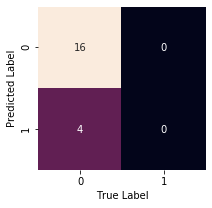

In [61]:
# store the predicted values
y_preds = gs_model.best_estimator_.predict(X_test)
# view the confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)
# view the confusion matrix in heatmap
plot_conf_mat(conf_mat)

### Decission tree

In [38]:
# load module
from sklearn.tree import DecisionTreeClassifier
# create the pipeline
modelDec = Pipeline(steps=[
    ("dec", DecisionTreeClassifier())
])
#make the result reproducable
np.random.seed(105)
#fit the data
modelDec.fit(X_train, y_train)
#view score
modelDec.score(X_test, y_test)

0.8

In [57]:
# trace back all of the steps with recusion
pipe_grid_dec = {
  "dec__criterion": ['gini', 'entropy'],
  "dec__max_depth": [1,2,3,4,None]
}
#make the result reproducable
np.random.seed(105)
gs_model_dec = GridSearchCV(modelDec, pipe_grid_dec, verbose=2)
gs_tests_dec = gs_model_dec.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] dec__criterion=gini, dec__max_depth=1 ...........................
[CV] ............ dec__criterion=gini, dec__max_depth=1, total=   0.0s
[CV] dec__criterion=gini, dec__max_depth=1 ...........................
[CV] ............ dec__criterion=gini, dec__max_depth=1, total=   0.0s
[CV] dec__criterion=gini, dec__max_depth=1 ...........................
[CV] ............ dec__criterion=gini, dec__max_depth=1, total=   0.0s
[CV] dec__criterion=gini, dec__max_depth=1 ...........................
[CV] ............ dec__criterion=gini, dec__max_depth=1, total=   0.0s
[CV] dec__criterion=gini, dec__max_depth=1 ...........................
[CV] ............ dec__criterion=gini, dec__max_depth=1, total=   0.0s
[CV] dec__criterion=gini, dec__max_depth=2 ...........................
[CV] ............ dec__criterion=gini, dec__max_depth=2, total=   0.0s
[CV] dec__criterion=gini, dec__max_depth=2 ...........................[Parallel(n_jobs=

In [58]:
gs_model_dec.score(X_test, y_test)

0.8

In [59]:
gs_model_dec.best_params_

{'dec__criterion': 'gini', 'dec__max_depth': 1}

[[16  0]
 [ 4  0]]


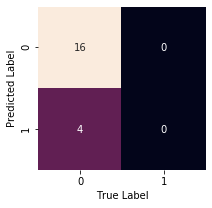

In [62]:
# store the predicted values
y_preds_dec = gs_model_dec.best_estimator_.predict(X_test)
# view the confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)
# view the confusion matrix in heatmap
plot_conf_mat(conf_mat)

In [88]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
#initialize our 2d pd data frame for storing values
columns = ["Accuracy Score", "F1 Score", "Recall Score", "Precision Score"]
rows = ["Decission Tree", "K Nearest Neighbor"]
scores = pd.DataFrame(columns = columns, index = rows)
scores.loc["Decission Tree", "Accuracy Score"] = accuracy_score(y_test, modelDec.predict(X_test))
scores.loc["Decission Tree", "F1 Score"] = f1_score(y_test, modelDec.predict(X_test))
scores.loc["Decission Tree", "Recall Score"] = recall_score(y_test, modelDec.predict(X_test))
scores.loc["Decission Tree", "Precision Score"] = precision_score(y_test, modelDec.predict(X_test))
scores.loc["K Nearest Neighbor", "Accuracy Score"] = accuracy_score(y_test, model.predict(X_test))
scores.loc["K Nearest Neighbor", "F1 Score"] = f1_score(y_test, model.predict(X_test))
scores.loc["K Nearest Neighbor", "Recall Score"] = recall_score(y_test, model.predict(X_test))
scores.loc["K Nearest Neighbor", "Precision Score"] = precision_score(y_test, model.predict(X_test))
scores

Accuracy Score  F1 Score Recall Score Precision Score
Decission Tree                0.8  0.333333         0.25             0.5
K Nearest Neighbor           0.65  0.222222         0.25             0.2

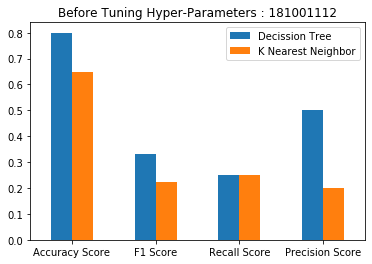

In [112]:
scores.T.plot(kind = "bar", title = "Before Tuning Hyper-Parameters : 181001112")
plt.xticks(rotation = "horizontal")
plt.savefig("./Graphs/before.png")

In [113]:
#initialize our 2d pd data frame for storing values
columns = ["Accuracy Score", "F1 Score", "Recall Score", "Precision Score"]
rows = ["Decission Tree", "K Nearest Neighbor"]
scores = pd.DataFrame(columns = columns, index = rows)
scores.loc["Decission Tree", "Accuracy Score"] = accuracy_score(y_test, gs_model_dec.predict(X_test))
scores.loc["Decission Tree", "F1 Score"] = f1_score(y_test, gs_model_dec.predict(X_test))
scores.loc["Decission Tree", "Recall Score"] = recall_score(y_test, gs_model_dec.predict(X_test))
scores.loc["Decission Tree", "Precision Score"] = precision_score(y_test, gs_model_dec.predict(X_test))
scores.loc["K Nearest Neighbor", "Accuracy Score"] = accuracy_score(y_test, gs_model.predict(X_test))
scores.loc["K Nearest Neighbor", "F1 Score"] = f1_score(y_test, gs_model.predict(X_test))
scores.loc["K Nearest Neighbor", "Recall Score"] = recall_score(y_test, gs_model.predict(X_test))
scores.loc["K Nearest Neighbor", "Precision Score"] = precision_score(y_test, gs_model.predict(X_test))
scores

Accuracy Score F1 Score Recall Score Precision Score
Decission Tree                0.8        0            0               0
K Nearest Neighbor            0.8        0            0               0

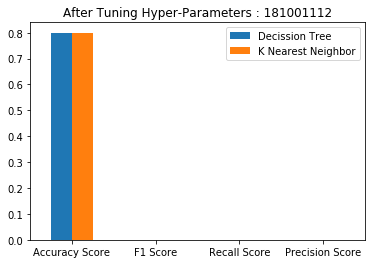

In [114]:
scores.T.plot(kind = "bar", title = "After Tuning Hyper-Parameters : 181001112")
plt.xticks(rotation = "horizontal")
plt.savefig("./Graphs/after.png")